# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [1]:
import glob
import cv2
import numpy as np
import random
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt

In [5]:
data_dir = '/content/data'
!unzip '/content/data.zip'

Archive:  /content/data.zip
replace data/cat.10172.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: data/cat.10172.jpg      
replace data/cat.10195.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/cat.10195.jpg      
  inflating: data/cat.1021.jpg       
  inflating: data/cat.10949.jpg      
  inflating: data/cat.11521.jpg      
  inflating: data/cat.11535.jpg      
  inflating: data/cat.11843.jpg      
  inflating: data/cat.119.jpg        
  inflating: data/cat.11946.jpg      
  inflating: data/cat.11959.jpg      
  inflating: data/cat.12263.jpg      
  inflating: data/cat.12479.jpg      
  inflating: data/cat.1666.jpg       
  inflating: data/cat.1807.jpg       
  inflating: data/cat.1848.jpg       
  inflating: data/cat.2098.jpg       
  inflating: data/cat.223.jpg        
  inflating: data/cat.225.jpg        
  inflating: data/cat.2326.jpg       
  inflating: data/cat.2479.jpg       
  inflating: data/cat.2482.jpg       
  inflating: data/cat.2749.jpg       


### Read Images

In [7]:
images = []
labels = []
classnames = ['cat', 'dog']
folder = '/content/data'
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, filename))
    img = cv2.resize(img, (28, 28))
    images.append(img)
    if filename.split('.')[0]=="cat":
      labels.append(0)
    else:
      labels.append(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


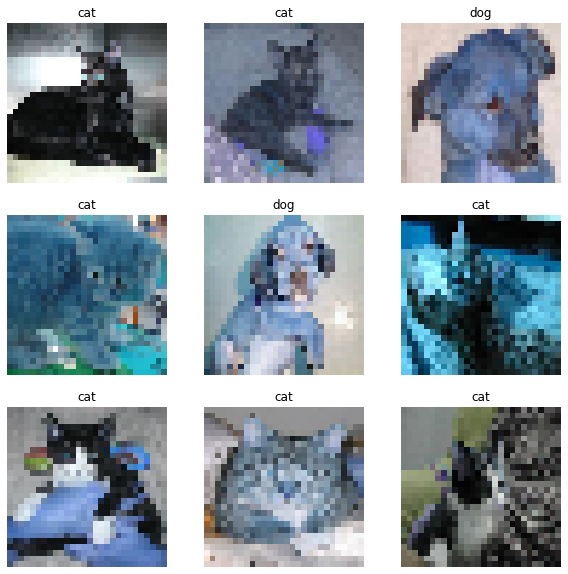

In [8]:
plt.figure(figsize=(10, 10))
for image in images:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")

In [10]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
images = np.divide(images, 255)
x_train = np.array(images)
x_train = x_train.flatten().reshape(100, 2352)
y_train = np.array(labels)

In [11]:
# Check your dataset and labels to be a numpy ndarray of sizes (100, 28 * 28 * 3) and (100, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
print(x_train.shape)
print(y_train.shape)

(100, 2352)
(100,)


### Prepare Dataset

### Create your Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split

In [22]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model1 = Sequential()
model1.add(Dense(512, input_shape=(2352,), activation='relu'))
model1.add(Dense(10, kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [20]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33)

In [23]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# uncomment below and complete the code
history = model1.fit(
      x_train, y_train,
      epochs=20,
      batch_size=5,
      validation_split=0.2,
      shuffle=True,
      verbose=1)
########################



Epoch 1/20
7/7 [==============================] - 1s 60ms/step - loss: 0.6936 - accuracy: 0.4286 - val_loss: 0.6938 - val_accuracy: 0.4444
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.6928 - accuracy: 0.5143 - val_loss: 0.6942 - val_accuracy: 0.4444
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6922 - accuracy: 0.5143 - val_loss: 0.6947 - val_accuracy: 0.4444
Epoch 4/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6917 - accuracy: 0.5143 - val_loss: 0.6953 - val_accuracy: 0.4444
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6918 - accuracy: 0.5143 - val_loss: 0.6970 - val_accuracy: 0.4444
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6902 - accuracy: 0.5143 - val_loss: 0.6988 - val_accuracy: 0.4444
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6881 - accuracy: 0.5143 - val_loss: 0.7017 - val_accuracy: 0.4444
Epoch 8/20
7/7 [===========

### Plot results

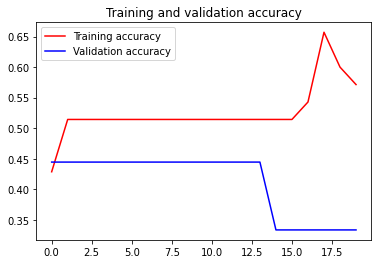

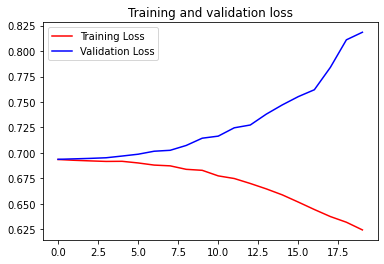

In [24]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [26]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
########################
model1.evaluate(x_test, y_test)


1/1 [==============================] - 0s 27ms/step - loss: 0.7719 - accuracy: 0.3913


[0.7718790173530579, 0.3913043439388275]

# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [27]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [28]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [29]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [30]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [31]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [32]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [33]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [34]:
# For each image in our dataset run the previous methods and create a new dataset

    ########################
    ## PUT YOUR CODE HERE ##
    ########################

aug_images = []
for img in images:
    aug_images.append(img)

    img2 = horizontal_shift(image)
    aug_images.append(img2)

    img3 = vertical_shift(image)
    aug_images.append(img3)

    img4 = brightness(image, 10, 30)
    aug_images.append(img4)

    img5 = zoom(image, 0.3)
    aug_images.append(img5)

    img6 = channel_shift(image, 5)
    aug_images.append(img6)

    img7 = horizontal_flip(image)
    aug_images.append(img7)

    img8 = vertical_flip(image)
    aug_images.append(img8)


In [35]:

# Extend your labels array new size with correct labels maped to each agumented image

    ########################
    ## PUT YOUR CODE HERE ##
    ########################
aug_labels = []
for l in labels:
  for i in range(0, 8):
    aug_labels.append(l)


In [36]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
aug_images = np.divide(aug_images, 255)
x_train = np.array(aug_images)
x_train = x_train.flatten().reshape(800, 2352)
y_train = np.array(aug_labels)

In [37]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
print(x_train.shape)
print(y_train.shape)

(800, 2352)
(800,)


### Create your model

In [38]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model2 = Sequential()
model2.add(Dense(512, input_shape=(2352,), activation='relu'))
model2.add(Dense(10, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [39]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33)

In [40]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# uncomment below and complete the code
history = model2.fit(
      x_train, y_train,
      epochs=20,
      batch_size=5,
      validation_split=0.2,
      shuffle=True,
      verbose=1)



Epoch 1/20
86/86 [==============================] - 2s 12ms/step - loss: 0.6965 - accuracy: 0.4836 - val_loss: 0.6933 - val_accuracy: 0.4630
Epoch 2/20
86/86 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.4630
Epoch 3/20
86/86 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.4346 - val_loss: 0.6932 - val_accuracy: 0.4630
Epoch 4/20
86/86 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4630
Epoch 5/20
86/86 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4630
Epoch 6/20
86/86 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4630
Epoch 7/20
86/86 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4630
Epoch 8/20
86

### Plot your results

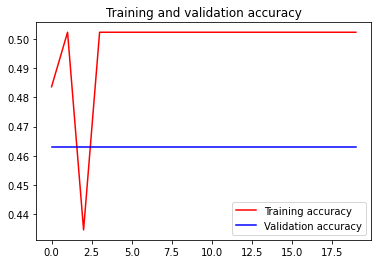

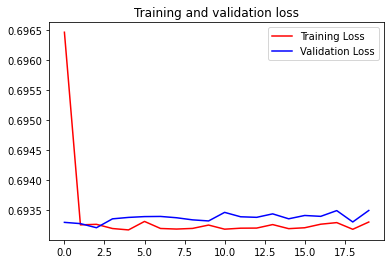

In [41]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [42]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
########################
model2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5114


[0.6930540800094604, 0.5113636255264282]

# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [ ]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/

In [43]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array



########################
## PUT YOUR CODE HERE ##
########################
data_dir='/content/data_aug'
!unzip '/content/images.zip'


Archive:  /content/images.zip
   creating: data_aug/cat/
  inflating: data_aug/cat/cat.10172.jpg  
  inflating: data_aug/cat/cat.10195.jpg  
  inflating: data_aug/cat/cat.1021.jpg  
  inflating: data_aug/cat/cat.10949.jpg  
  inflating: data_aug/cat/cat.11521.jpg  
  inflating: data_aug/cat/cat.11535.jpg  
  inflating: data_aug/cat/cat.11843.jpg  
  inflating: data_aug/cat/cat.119.jpg  
  inflating: data_aug/cat/cat.11946.jpg  
  inflating: data_aug/cat/cat.11959.jpg  
  inflating: data_aug/cat/cat.12263.jpg  
  inflating: data_aug/cat/cat.12479.jpg  
  inflating: data_aug/cat/cat.1666.jpg  
  inflating: data_aug/cat/cat.1807.jpg  
  inflating: data_aug/cat/cat.1848.jpg  
  inflating: data_aug/cat/cat.2098.jpg  
  inflating: data_aug/cat/cat.223.jpg  
  inflating: data_aug/cat/cat.225.jpg  
  inflating: data_aug/cat/cat.2326.jpg  
  inflating: data_aug/cat/cat.2479.jpg  
  inflating: data_aug/cat/cat.2482.jpg  
  inflating: data_aug/cat/cat.2749.jpg  
  inflating: data_aug/cat/cat.343.

In [44]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
########################
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(28, 28),
  batch_size=100)


Found 100 files belonging to 2 classes.


In [45]:
print(len(os.listdir('/content/data_aug/dog')))
print(len(os.listdir('/content/data_aug/cat')))

50
50


In [46]:
class_names = ds.class_names
print(class_names)

['cat', 'dog']


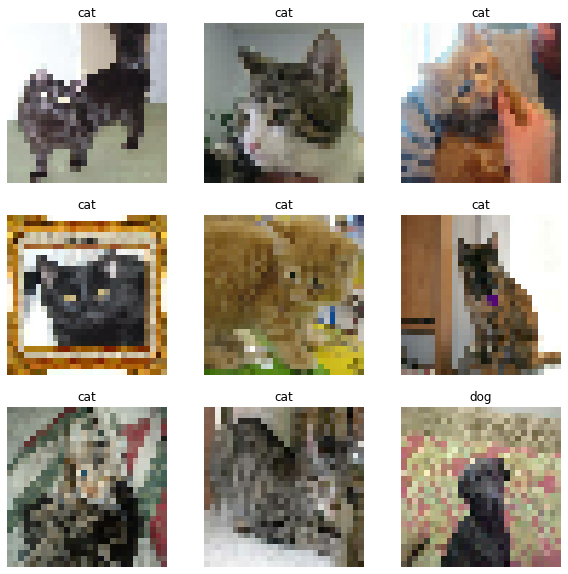

In [47]:
plt.figure(figsize=(10, 10))
for images, labels in ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
# Check your dataset and labels to be a numpy ndarray of sizes (100, 28 * 28 * 3) and (100, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
for image_batch, labels_batch in ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 28, 28, 3)
(100,)


In [49]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = ds.map(lambda x, y: (normalization_layer(x), y))
x_train, y_train = next(iter(normalized_ds))


In [50]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
########################
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.flatten().reshape(100, 2352)
print(x_train.shape)
print(y_train.shape)

(100, 2352)
(100,)


In [51]:
from tensorflow.keras import layers

In [52]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [56]:
IMG_SIZE = 25
resize = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE)
])

In [65]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model3 = tf.keras.Sequential([
  Dense(512, input_shape=(2352,), activation='relu'),
  Dense(10, kernel_initializer='normal', activation='relu'),
  Dense(1, kernel_initializer='normal', activation='sigmoid')
])


In [61]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33)

In [67]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# uncomment below and complete the code
history = model3.fit(
      x_train, y_train,
      epochs=20,
      batch_size=5,
      validation_split=0.2,
      shuffle=True,
      verbose=1)

Epoch 1/20
11/11 [==============================] - 2s 67ms/step - loss: 0.4734 - accuracy: 0.7736 - val_loss: 0.7761 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - 0s 28ms/step - loss: 0.4577 - accuracy: 0.8302 - val_loss: 0.9526 - val_accuracy: 0.4286
Epoch 3/20
11/11 [==============================] - 0s 28ms/step - loss: 0.4666 - accuracy: 0.8491 - val_loss: 0.7959 - val_accuracy: 0.5000
Epoch 4/20
11/11 [==============================] - 0s 29ms/step - loss: 0.4434 - accuracy: 0.7736 - val_loss: 1.0509 - val_accuracy: 0.4286
Epoch 5/20
11/11 [==============================] - 0s 24ms/step - loss: 0.4336 - accuracy: 0.7925 - val_loss: 0.8052 - val_accuracy: 0.5714
Epoch 6/20
11/11 [==============================] - 0s 24ms/step - loss: 0.4282 - accuracy: 0.7736 - val_loss: 1.2386 - val_accuracy: 0.4286
Epoch 7/20
11/11 [==============================] - 0s 16ms/step - loss: 0.4567 - accuracy: 0.7925 - val_loss: 0.8511 - val_accuracy: 0.5000
Epoch 8/20
11